In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from itertools import product

import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cmocean

import cartopy
import cartopy.crs as ccrs

import xpersist as xp
cache_dir = '/glade/p/cgd/oce/projects/cesm2-marbl/xpersist_cache/3d_fields'
if (os.path.isdir(cache_dir)):
    xp.settings['cache_dir'] = cache_dir
os.makedirs(cache_dir, exist_ok=True)

os.environ['CESMDATAROOT'] = '/glade/scratch/mclong/inputdata'
import pop_tools

import climo_utils as cu
import utils
import calc

import plot

In [3]:
cluster, client = utils.get_ClusterClient()
cluster.scale(12) #adapt(minimum_jobs=0, maximum_jobs=24)
client

/glade/work/mclong/miniconda3/envs/co2-hole/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://10.12.205.24:39433 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/mclong/proxy/40874/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
ds_grid = pop_tools.get_grid('POP_gx1v7')

/glade/work/mclong/miniconda3/envs/co2-hole/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


In [5]:
def monthly_clim(ds):
    return ds.groupby('time.month').mean('time')

In [6]:
time_slice = slice("1990-01-15", "2015-01-15")
varlist = [
    'MOC',
]
ds_list = []
for variable in varlist:
    xp_func = xp.persist_ds(cu.read_CESM_var, name=f'moc-{variable}', trust_cache=True)    
    ds_list.append(xp_func(
        time_slice, 
        variable, 
        mean_dims=['member_id', 'time']
    ))
    
ds = xr.merge(ds_list)
#dsp = utils.pop_add_cyclic(ds)
#dsp.info()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'


writing cache file: /glade/p/cgd/oce/projects/cesm2-marbl/xpersist_cache/3d_fields/moc-MOC.nc


In [7]:
client.close()
cluster.close()
del client
del cluster

In [8]:
ds.MOC

<xarray.DataArray 'MOC' (transport_reg: 2, moc_comp: 3, moc_z: 61, lat_aux_grid: 395)>
array([[[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           1.8552087e-06,  5.2411838e-07, -2.3534970e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -1.0111812e-03, -2.2635664e-04, -2.2058889e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -1.2320000e-03, -1.7358293e-04,  3.5373221e-06],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -2.8942293e-07, -2.8942293e-07, -2.8942293e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -1.8896553e-07, -1.8896553e-07, -1.8896553e-07],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

        [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -2.6177650e-03, -5.6658505e-04, -5.9773221e-08],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -4.7982326e-03, -1.1096082e-03, -1.3328979e-07],
...
           3.3913450e-09,  3.3913450e-09,  3.3913450e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           4.0364410e-09,  4.0364410e-09,  4.0364410e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

        [[-4.3935824e-09, -4.3935824e-09, -4.3935824e-09, ...,
          -4.3935824e-09, -4.3935824e-09, -4.3935824e-09],
         [-8.3601969e-01, -8.3601969e-01, -8.3601969e-01, ...,
          -8.4763113e-03, -7.4744280e-03, -6.9430806e-03],
         [-1.3141004e+00, -1.3141004e+00, -1.3141004e+00, ...,
          -6.9762930e-02, -6.8364821e-02, -6.7667484e-02],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]]],
      dtype=float32)
Coordinates:
  * lat_aux_grid  (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z         (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: transport_reg, moc_comp
Attributes:
    long_name:     Meridional Overturning Circulation
    units:         Sverdrups
    coordinates:   lat_aux_grid moc_z moc_components transport_region time
    cell_methods:  time: mean

In [32]:
MOC = ds.MOC.sum('moc_comp').assign_coords({'transport_reg': ['Global', 'Atlantic']})
moc_pac = (MOC.sel(transport_reg='Global') - MOC.sel(transport_reg='Atlantic')).expand_dims({'transport_reg': ['Pacific']})
MOC = xr.concat((MOC, moc_pac), dim='transport_reg')
MOC

<xarray.DataArray 'MOC' (transport_reg: 3, moc_z: 61, lat_aux_grid: 395)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.85520867e-06,  5.24118377e-07, -2.35349695e-09],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -4.18122970e-02, -3.79744172e-02, -3.66504043e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.56482786e-01, -1.50337666e-01, -1.48353726e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -3.39341142e-07, -3.39341142e-07, -3.39341142e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.57798453e-07, -1.57798453e-07, -1.57798453e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.07087588e+00,  1.07087588e+00,  1.07087588e+00, ...,
          1.07104623e+00,  1.07104492e+00,  1.07104445e+00],
        [ 4.43066776e-01,  4.43066776e-01,  4.43066776e-01, ...,
          7.10649490e-01,  7.14487374e-01,  7.15811312e-01],
        [ 2.64365315e-01,  2.64365315e-01,  2.64365315e-01, ...,
          2.83873856e-01,  2.90018976e-01,  2.92002916e-01],
...
         -1.37023406e-07, -1.37023406e-07, -1.37023406e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -5.27740731e-08, -5.27740731e-08, -5.27740731e-08],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.07087588e+00, -1.07087588e+00, -1.07087588e+00, ...,
         -1.07104433e+00, -1.07104445e+00, -1.07104445e+00],
        [-4.43066776e-01, -4.43066776e-01, -4.43066776e-01, ...,
         -7.52461791e-01, -7.52461791e-01, -7.52461731e-01],
        [-2.64365315e-01, -2.64365315e-01, -2.64365315e-01, ...,
         -4.40356642e-01, -4.40356642e-01, -4.40356642e-01],
        ...,
        [ 1.66422091e-02,  1.66422091e-02,  1.66422091e-02, ...,
         -2.02317736e-07, -2.02317736e-07, -2.02317736e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.05024384e-07, -1.05024384e-07, -1.05024384e-07],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * lat_aux_grid   (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z          (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
  * transport_reg  (transport_reg) object 'Global' 'Atlantic' 'Pacific'

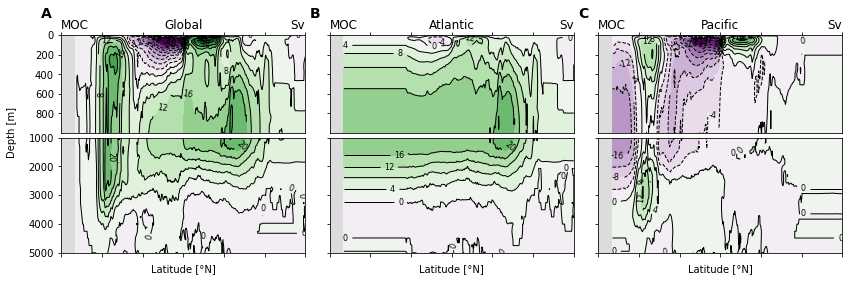

In [50]:
plot.moc(MOC)
utils.savefig('moc')